
# 02 - Cointegration Tests
This notebook tests for cointegration between the chosen stock pair and computes the hedge ratio.



In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt 


In [2]:
# Load cleaned data
data = pd.read_csv("../data/processed/ko_pep_clean.csv", index_col=0, parse_dates=True)
ko, pep = data["KO"], data["PEP"]



In [3]:
window = 60  # 60 trading days
betas = []

for i in range(window, len(ko)):
    X = sm.add_constant(pep[i-window:i])
    model = sm.OLS(ko[i-window:i], X).fit()
    betas.append(model.params[1])

# align betas with spread index
import numpy as np
betas = np.array([np.nan]*(window) + betas)
spread = ko - betas * pep


/var/folders/bv/q79dnkgx31j62rs4kyg5rwpm0000gn/T/ipykernel_2495/121862701.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas.append(model.params[1])
/var/folders/bv/q79dnkgx31j62rs4kyg5rwpm0000gn/T/ipykernel_2495/121862701.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas.append(model.params[1])
/var/folders/bv/q79dnkgx31j62rs4kyg5rwpm0000gn/T/ipykernel_2495/121862701.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [4]:
# Save spread and beta for next notebook
spread.to_csv("../data/processed/spread.csv")
pd.DataFrame({'beta': [betas]}).to_csv("../data/processed/beta.csv")



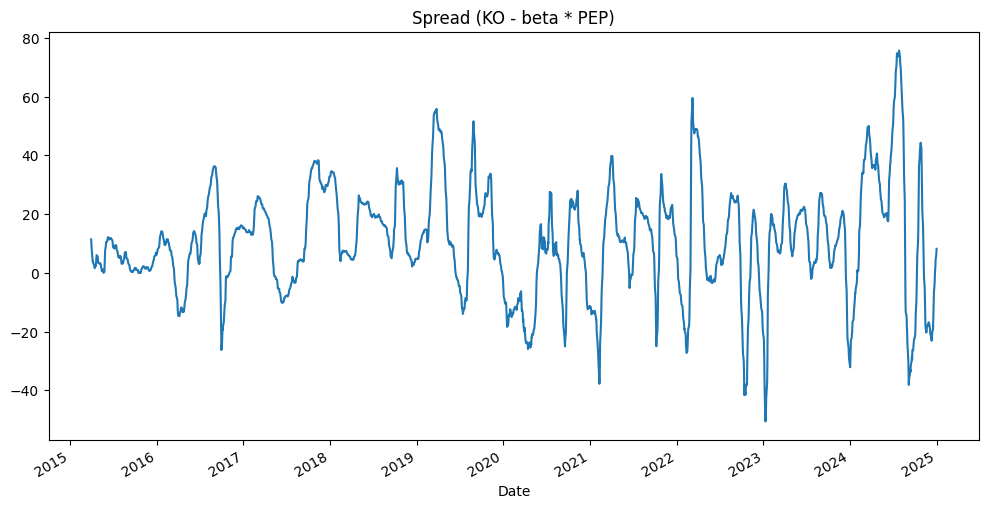

In [5]:
# Plot spread
spread.plot(figsize=(12,6), title="Spread (KO - beta * PEP)")
plt.show()

In [6]:
# Cointegration test (static, for reference)
score, pvalue, _ = coint(ko, pep)
print("Cointegration p-value:", pvalue)

Cointegration p-value: 0.29883312111047633
